# <span style = "color:coral">Disaster Tweets</span>

The file contains over 11,000 tweets associated with disaster keywords like “crash”, “quarantine”, and “bush fires” as well as the location and keyword itself. The data structure was inherited from Disasters on social media

The tweets were collected on Jan 14th, 2020.

Some of the topics people were tweeting:

* The eruption of Taal Volcano in Batangas, Philippines
* Coronavirus
* Bushfires in Australia
* Iran downing of the airplane flight PS752

Disclaimer: The dataset contains text that may be considered profane, vulgar, or offensive.

Download the dataset from this website: <a href = "https://www.kaggle.com/datasets/vstepanenko/disaster-tweets"> Here </a>

***

### Import Necessary Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Read 'disaster tweets.csv'

In [37]:
df = pd.read_csv('disaster tweets.csv')

In [38]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


### Check info of the dataset

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


### Drop unwanted columns

In [40]:
df.drop(columns = ['id','keyword','location'], inplace= True)

In [41]:
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


### Plot a countplot or piechart of the Target

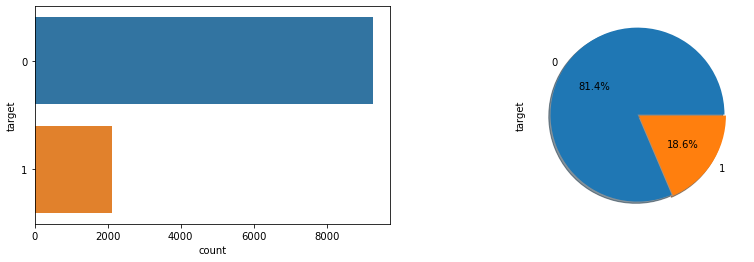

In [43]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df['target'])
plt.subplot(1,2,2)
df['target'].value_counts().plot.pie(explode = [0.01,0.01], autopct = '%1.1f%%', shadow = True)
plt.show()

In [149]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]

### Reduce the sample size of both targets to 2000

In [153]:
df = pd.concat([df0[0:2000],df1[0:2000]])

In [155]:
df = df.sample(frac = 1)

In [156]:
df.reset_index(drop = True, inplace = True)

### Plot countplot of piechart after sample reduction

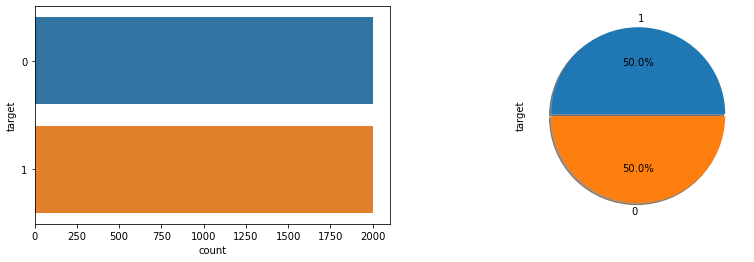

In [157]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df['target'])
plt.subplot(1,2,2)
df['target'].value_counts().plot.pie(explode = [0.01,0.01], autopct = '%1.1f%%', shadow = True)
plt.show()

### View some of the texts along with its target

In [45]:
for i in range(10):
    print(df['text'][i],'---',df['target'][i])
    print()

Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze… --- 1

Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po… --- 1

Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI --- 1

Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9 --- 1

"Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8 --- 0

If this child was Chinese, this tweet would have gone viral. Social media would be ablaze. SNL would have made a racist j… --- 0

Several houses have been set ablaze in Ngemsibaa village, Oku sub division in the North West Region of Cameroon by… https://t.co/99uHGAzxy2 --- 1

Asansol: A BJP office in Salanpur village was set ablaze last night. BJP has alleged that TMC is behind the incident. Police has b… --- 1

There seems to be some urls in the text. Remove those with the following regular expression when creating the function to preprocess the text

<center> (https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)</center>

### Create a function to preprocess the text:
* Convert all texts to lowercaser
* Lemmatize all the words
* Remove any stopwords
* Remove any special characters

In [158]:
def preprocess(sentence):
    text = re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)",' ',sentence)
    text = re.sub(r"[^0-9a-zA-Z]",' ', text).split()
    
    text = [i.lower() for i in text if i not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

In [159]:
df['text'] = df['text'].apply(preprocess)

In [160]:
df.head()

,text,target
0,syria southern idlib countryside assad regime ...,1
1,assassination iranian general killing 176 inno...,1
2,two civilian casualty succumbed injury total 5...,1
3,next desperate measure community taking ensure...,1
4,israel demolish home palestinian prisoner west...,1


### Print some of the text after applying the preprocess function

In [161]:
for i in range(10):
    print(df['text'][i],'---',df['target'][i])
    print()

syria southern idlib countryside assad regime militia stationed nearby checkpoint bomb town tal min --- 1

assassination iranian general killing 176 innocent passenger aboard r --- 1

two civilian casualty succumbed injury total 5 civilian shaheed indian gun silent undertake ev --- 1

next desperate measure community taking ensure enough water survive --- 1

israel demolish home palestinian prisoner westbank warcrimes via --- 1

rubble 9 11 since got going --- 1

damage another 6 0 earthquake hit puerto rico morning severe seismic activity stopped since december 28 --- 1

wake hurricane harvey grew volunteer base 8 83 000 rebuild houston u --- 1

1496days since inhuman zariagenocide wicked mass murderer tyrant 548 men murdered 297 woman murdered 19 --- 1

destruction wildlife bush fire horrific distressing sight two kookaburra early th --- 0



### Split the dataset into Input & Target Variables

In [342]:
X = df['text']
y = df['target']

In [343]:
y = pd.get_dummies(y)

In [344]:
y = y.values

### Convert text to sequence and add padding

In [345]:
tokenizer = Tokenizer(num_words=10000)

In [346]:
tokenizer.fit_on_texts(X)

In [347]:
vocab_size = len(tokenizer.word_index) + 1

In [348]:
def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    padded_sequence = pad_sequences(encoded_docs, maxlen=50)
    return padded_sequence

In [349]:
X = text_encoding(X)

### Split the dataset into training & testing set

In [388]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

### Create a keras sequential model with Bidirectional layers

In [351]:
model = Sequential([
    layers.Embedding(vocab_size,100),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation = 'relu')),
    layers.Dropout(0.2),
    layers.LSTM(64, activation='relu'),
    layers.Dense(2, activation = 'sigmoid')
])

### Compile the model

In [352]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

### Train the model

In [353]:
model.fit(X_train,y_train,epochs = 10, validation_split = 0.1)

Epoch 1/10
90/90 [==============================] - 12s 100ms/step - loss: 8033.9175 - accuracy: 0.6424 - val_loss: 0.4032 - val_accuracy: 0.8062
Epoch 2/10
90/90 [==============================] - 8s 90ms/step - loss: 0.2880 - accuracy: 0.8972 - val_loss: 0.3648 - val_accuracy: 0.8562
Epoch 3/10
90/90 [==============================] - 8s 90ms/step - loss: 0.0790 - accuracy: 0.9698 - val_loss: 0.7002 - val_accuracy: 0.8500
Epoch 4/10
90/90 [==============================] - 8s 90ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 1.1584 - val_accuracy: 0.8469
Epoch 5/10
90/90 [==============================] - 8s 90ms/step - loss: 150495.6719 - accuracy: 0.9781 - val_loss: 0.5601 - val_accuracy: 0.8438
Epoch 6/10
90/90 [==============================] - 8s 90ms/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 2.8479 - val_accuracy: 0.8594
Epoch 7/10
90/90 [==============================] - 8s 91ms/step - loss: 0.0110 - accuracy: 0.9951 - val_loss: 1.9849 - val_accuracy: 0.8500
Epo

### Make Predictions with X_test

In [404]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 27ms/step


### Evaluate the model

### Check accuracy_score

In [399]:
y_test = [np.argmax(i) for i in y_test]

In [411]:
y_pred = [np.argmax(i) for i in y_pred]

In [412]:
accuracy_score(y_test,y_pred)

0.94875

### Plot confusion matrix on heatmap

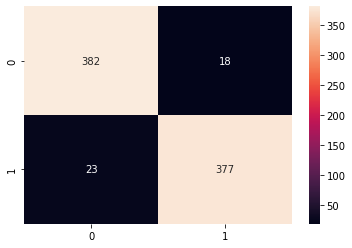

In [415]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt = 'd')
plt.show()

### Print Classification Report

In [414]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       400
           1       0.95      0.94      0.95       400

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



***